# Homework 1
- This homework is a "warm up" - it is NOT graded, but you must submit it
- Your notebook file name must be 'YourUNI.ipynb' - just rename
the notebook you downloaded, and add cells with your work in them

# Tasks
- Answer the survey below
- Install the [Anaconda](https://www.anaconda.com/download/) distribution on your machine
- Try running the notebook server
    - cd to the directory containing this notebook file
    - start the notebook server by typing 'jupyter notebook' in a terminal/shell/command window
    - in a browser, goto 'localhost:8888' - you should get a list of files
    in the directory. double click on 'w1-Homework.ipynb'
        - if you set the environment variable 'BROWSER' to 'open', a browser window should open automatically when you start the server
    - click on Help/User Interface Tour
    - click on Help/Keyboard Shortcuts
    - learn how to navigate cells, enter python expressions, and evaluate them
- Look at the problems below
    - Try doing some or all of them in the notebook
    - If you can't do them, do NOT worry
    - I will go over the problems in class

# Survey

Are you an undergrad or grad student?


What is your major?

What is the most recent Computer Science class you have taken, if any?



In [37]:
# you MUST evaluate this cell, or the code below will not work

# the output of this cell should include something like:

# '3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]

# if you don't see this, something went wrong with your install

import math
import random
import sys
import re

sys.version

'3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

# Hints for the problems
- function definition is described in the w1-06-classes notebook

In [38]:
# a useful method on string is isdigit

s = 'a3'

[s[0].isdigit(), s[1].isdigit()]

[False, True]

In [39]:
# math functions, pi constant

[math.sqrt(4), math.sin(math.pi/2), math.cos(math.pi/4)]

[2.0, 1.0, 0.7071067811865476]

In [40]:
# abs value function

[abs(4), abs(-4)]

[4, 4]

In [41]:
# random.choice randomly picks an element from a list 

clist = range(10)
for j in range(7):
    print(random.choice(clist))

6
5
2
1
9
7
7


In [42]:
# instead of 

pt = [3,4]

xcord = pt[0]
ycord = pt[1]

# can use destructuring...

xcord, ycord = pt

[xcord, ycord]

[3, 4]

In [43]:
# find the digits in a string with a regular expression

re.findall("[0-9]", "abc3def7xy8z")


['3', '7', '8']

# Problems

# circlePoints
- represent a 2D point as a list - [x,y]
- origin is [0,0]
- generates n evenly spaced points on a circle centered at the origin
- points can be viewed as the vertexes of a regular n side polygon(n-gon)
- note that due to floating point round off errors, zero is often represented by very small numbers, like 1e-16

In [44]:
def circlePoints(n, radius):
    ans = []
    for j in range(n):
        ang = j * 2 * math.pi / n
        ans.append([radius * math.cos(ang), radius * math.sin(ang)])
    return ans

# pts are really [[1,0],[0,1],[-1,0],[-1,-1]]
circlePoints(4,1)

[[1.0, 0.0],
 [6.123233995736766e-17, 1.0],
 [-1.0, 1.2246467991473532e-16],
 [-1.8369701987210297e-16, -1.0]]

In [52]:
# write 'chop' function to change tiny floats to 0.0

def chop(x):
    if abs(x) < 1e-15:
        return 0.0
    else:
        return x

chop(1.2246467991473532e-16)

0.0

In [53]:
[[chop(x), chop(y)] for [x,y] in circlePoints(4,1)]

[[1.0, 0.0], [0.0, 1.0], [-1.0, 0.0], [0.0, -1.0]]

# Distance computations
- write function 'euclid' that computes the straight line distance between two points
- write function 'manhattan' that computes the 'manhattan' distance(can only move horizontally or vertically) between two points


In [54]:
def euclid(pt1, pt2):
    # could do
    x1 = pt1[0]
    y1 = pt1[1]
    # but destructuring is much nicer
    x1,y1 = pt1
    x2,y2 = pt2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def manhattan(pt1, pt2):
    x1,y1 = pt1
    x2,y2 = pt2
    return abs(x1-x2)+abs(y1-y2)

In [55]:
pt1 = [0,0]
pt2 = [3,4]

euclid(pt1, pt2)

5.0

In [56]:
manhattan(pt1, pt2)

7

# sumPoints
- write a function that computes the x sum and the y sum of a list of points

In [57]:
def sumPoints(points):
    xsum = 0
    ysum = 0
    # destructure x,y in for loop
    for x,y in points:
        xsum += x
        ysum += y
    return [xsum, ysum]

In [58]:
sumPoints([[2,3],[3,4],[10,20]])

[15, 27]

In [59]:
# try running sumPoints on some n-gons from circlePoints
# the output is really [0,0], but remember floating point roundoff

sumPoints(circlePoints(4,1))

[-1.8369701987210297e-16, 2.220446049250313e-16]

In [60]:
p8 = circlePoints(8,1)
sumPoints(p8)

[-4.440892098500626e-16, -2.220446049250313e-16]

In [61]:
# it seems like for even n, the points always sum to [0,0]
# a simple symmetry argument proves this...

p64 = circlePoints(64,1)
sumPoints(p64)

[3.3306690738754696e-16, -3.552713678800501e-15]

In [62]:
import matplotlib.pyplot as plt

# make plots render in the notebook, instead of in an external window,
# which tends to be annoying
# plotting will be explained in detail later on
%matplotlib inline

def plotpts(pts):
    xpts = [x for x,y in pts]
    ypts = [y for x,y in pts]
    xpts.append(xpts[0])
    ypts.append(ypts[0])
    plt.plot(xpts, ypts, 'r', linewidth=10)
    plt.grid(True)

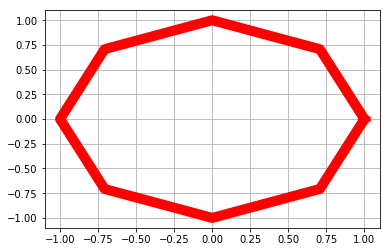

In [63]:
plotpts(p8)

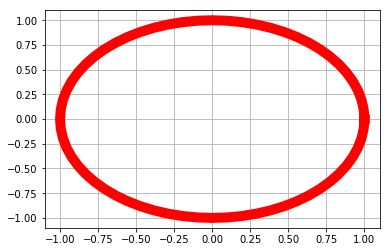

In [64]:
plotpts(p64)

In [65]:
# what about odd n?

p5 = circlePoints(5,1)
sumPoints(p5)

[-1.1102230246251565e-16, 1.1102230246251565e-16]

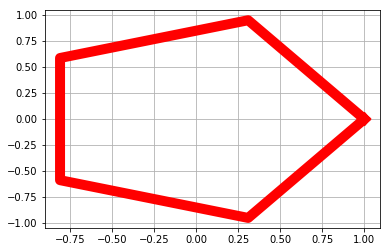

In [66]:
plotpts(p5)

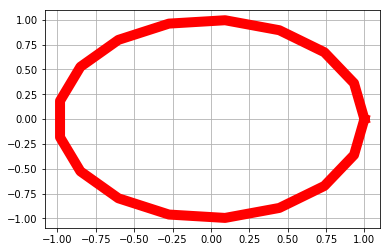

In [67]:
p17 = circlePoints(17,1)
plotpts(p17)

In [68]:
# it may seem surprising that odd n-gons also sum to [0,0]
# i know a complex way to prove this
# if you know a simple way - please tell me!!

sumPoints(circlePoints(63,1))

[-5.10702591327572e-15, 1.5543122344752192e-15]

# Approximate the area and circumference of a circle with n-gons
- write function perimeter, which gives the perimeter of an n-gon
- write function area, which gives the area of n-gon
    - can compute area by dividing n-gon into triangles
    - can find the area of each triangle by getting the base and height
- use euclid in both functions
- as n increases, the n-gon becomes more like a circle
- show that as n increases, area and perimeter values approach circle values

In [69]:
def perimeter(n, radius):
    cp = circlePoints(n, radius)
    # add the first point at the end 
    # so for loop will work
    cp.append(cp[0])
    total = 0
    for j in range(0, n):
        total += euclid(cp[j], cp[j+1])
    return total

def area(n, radius):
    # break up n-gon into triangles around the center
    # find base and height of triganle, area = base*height/2
    cp = circlePoints(n, radius)
    cp.append(cp[0])
    area = 0
    for j in range(n):
        x1,y1 = cp[j]
        x2,y2 = cp[j+1]
        xc = (x1+x2)/2
        yc = (y1+y2)/2
        height = euclid([xc,yc], [0,0])
        base = euclid(cp[j], cp[j+1])
        area += height * base/2
    return area


In [70]:
circlePoints(4,1)

[[1.0, 0.0],
 [6.123233995736766e-17, 1.0],
 [-1.0, 1.2246467991473532e-16],
 [-1.8369701987210297e-16, -1.0]]

In [71]:
area(4,1)

2.0

In [72]:
perimeter(4,1)

5.65685424949238

In [73]:
4*math.sqrt(2)

5.656854249492381

In [74]:
# area of radius 2 circle

math.pi * 2**2

12.566370614359172

In [75]:
def testArea(radius):
    # see how we do for various n-gons
    for n in [3,4,5,8,14,20,30,50,100,1000,1000000]:
        print(area(n, radius))

testArea(2)

5.196152422706632
8.0
9.510565162951536
11.313708498984763
12.148744695291626
12.360679774997898
12.47470144906556
12.533323356430415
12.55810390586267
12.566287931117719
12.566370614345734


In [76]:
# perimeter of radius 1 circle

2*math.pi

6.283185307179586

In [77]:
def testPerimeter(radius):
    for n in [3,4,5,8,14,20,30,50,100,1000,1000000]:
        print(perimeter(n, radius))

testPerimeter(1)

5.196152422706632
5.65685424949238
5.877852522924732
6.122934917841436
6.2305861507768014
6.257378601609234
6.27170779605921
6.279051952931337
6.282151815625652
6.2831749717590775
6.283185307177944


# random string generator
- string module - has useful constants
- [string doc page](https://docs.python.org/3/library/string.html)

In [78]:
import string
    
def randomString(n):
    # don't want digits in the string
    chars = string.ascii_letters + string.punctuation
    return ''.join([random.choice(chars) for j in range(n)])

for j in range(4):
    print(randomString(30))

Ps.!ps:kPxH!cWV#(rh@GM.$XwYb{Z
:j_CHg)x~r\uG#OXEy|KIQo<\Vba?S
Fmw*_)V+rGT)E}s#^/)S'Rl>"u'-!s
yvZ/+qq<&!]$QilSI*REZN$<R^DQTj


# define encrypt and decrypt functions
- encrypt - not so great encryption technique. 
    - takes a list of words and encrypts them 
    - each word is prefixed by a single digit character count
    - the digits/words are surrounded by random strings
- decrypt by searching for single digits 
- warning: these two are a tad tricky. don't spend much
time on them

In [79]:
def encrypt(s):
    words = s.split()
    rlen = range(5,15)
    # put random string in front of each word
    lenwords = [randomString(random.choice(rlen)) + str(len(w))+w for w in words]
    # end with random stringb
    lenwords.append(randomString(random.choice(rlen)))
    return ''.join(lenwords)
 
def decrypt(s):
    digits = re.findall("[0-9]", s)
    lastindex = 0
    words = []
    for digit in digits:
        newindex = s.find(digit, lastindex)
        newindex += 1
        wlen = int(digit)
        lastindex = newindex + wlen
        words.append(s[newindex:newindex+wlen])
    return ' '.join(words)

In [80]:
''.join(['asdf', 'zxcv'])

'asdfzxcv'

In [81]:
#e = encrypt(['Python', 'is', 'really', 'great!'])
e = encrypt('Python is really great!')
e

'>j/$vw<6Python[dM>cIS2isz{QeKMr/6reallym=\'d.HO6great!/]A:]OLL"'

In [82]:
decrypt(e)

'Python is really great!'